<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML5_professor_resolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Aplicando o Modelo de Árvore de Decisão e Calculando o Ganho de Informação**
---



In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# German Credit Risk

In [81]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",header=None,sep=' ')
df.columns = ["chk_acct", "duration", "credit_his", "purpose", 
                             "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", 
                             "present_resid", "property", "age", "other_install", "housing", "n_credits", 
                             "job", "n_people", "telephone", "foreign", "response"]

display(df.head())

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [82]:
df.describe(include='all')

,chk_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


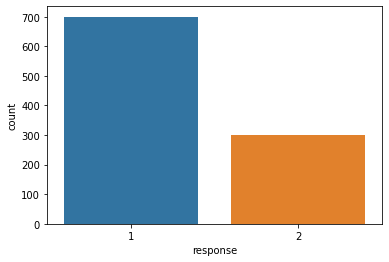

In [83]:
sns.countplot(x=df.response)
plt.show()

# Short Way...

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 

# X = df.drop(columns='response') # Don't work

X = df.drop(columns='response').select_dtypes(include=['number'])
y = df['response']

clf = DecisionTreeClassifier(criterion='entropy',max_depth=4)  

clf.fit(X,y)

y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))



0.733


# Better way...

* Label encode

In [85]:
df_non_numeric = df.select_dtypes(exclude=['number'])
display(df_non_numeric.head())

,chk_acct,credit_his,purpose,saving_acct,present_emp,sex,other_debtor,property,other_install,housing,job,telephone,foreign
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [86]:
df_numeric = df.select_dtypes(include=['number'])
display(df_numeric.head())

,duration,amount,installment_rate,present_resid,age,n_credits,n_people,response
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


In [87]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_labels = df_non_numeric.apply(LabelEncoder().fit_transform)

df = pd.concat([ df_labels, df_numeric ], axis=1) 

display(df.head())

,chk_acct,credit_his,purpose,saving_acct,present_emp,sex,other_debtor,property,other_install,housing,...,telephone,foreign,duration,amount,installment_rate,present_resid,age,n_credits,n_people,response
0,0,4,4,4,4,2,0,0,2,1,...,1,0,6,1169,4,4,67,2,1,1
1,1,2,4,0,2,1,0,0,2,1,...,0,0,48,5951,2,2,22,1,1,2
2,3,4,7,0,3,2,0,0,2,1,...,0,0,12,2096,2,3,49,1,2,1
3,0,2,3,0,3,2,2,1,2,2,...,0,0,42,7882,2,4,45,1,2,1
4,0,3,0,0,2,2,0,3,2,2,...,0,0,24,4870,3,4,53,2,2,2


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report 

X = df.drop(columns='response')
y = df['response']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=4)  
# clf = DecisionTreeClassifier(criterion='entropy') # worst results

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))



Score de Acuracidade (2):

0.72

Classification Report:

              precision    recall  f1-score   support

           1       0.76      0.88      0.81       210
           2       0.54      0.34      0.42        90

    accuracy                           0.72       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.69      0.72      0.70       300



# Tree, Mutual Information and Feature Selection

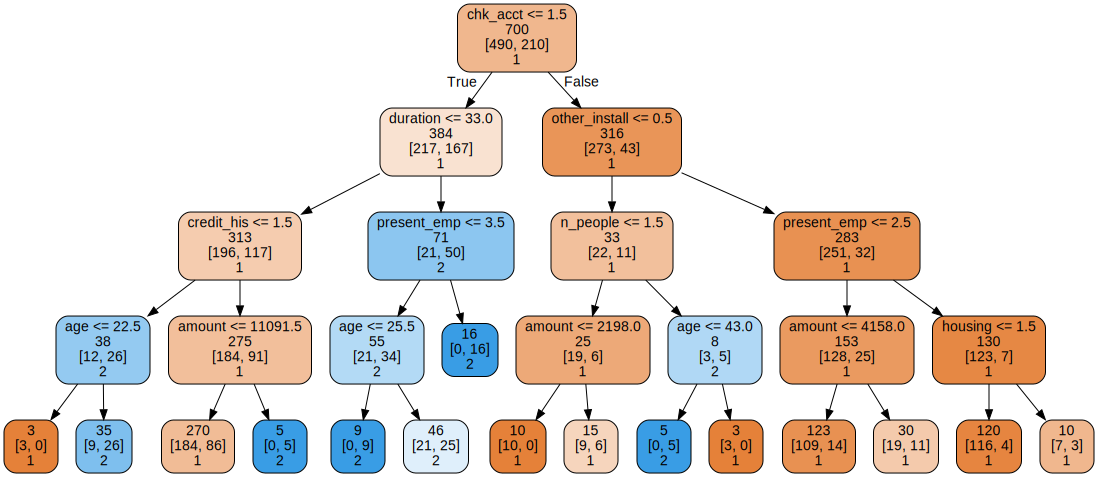

In [89]:
import graphviz 
from sklearn import tree

for c in df: # tree requires str!
  df[c] = df[c].astype('str')

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(df.drop(columns='response').columns.values),  
                     class_names=list(sorted(df['response'].unique())),  
                     filled=True, rounded=True,  
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)  
graph = graphviz.Source(dot_data)  

graph 

In [90]:
from sklearn.feature_selection import mutual_info_classif

print('Mutual information and the attribute with higher Mutual Info: \n')
print(mutual_info_classif(X, y, discrete_features=True))
print(X.columns[ mutual_info_classif(X, y, discrete_features=True).argmax() ])
print()
print('Feature Importances and the attribute with higher Feature Importances: \n')
print(clf.feature_importances_)
print(X.columns[ clf.feature_importances_.argmax() ])

Mutual information and the attribute with higher Mutual Info: 

[6.56679609e-02 3.02335546e-02 1.72548871e-02 1.94876078e-02
 9.08183792e-03 4.72071335e-03 3.32504154e-03 1.17732337e-02
 6.15172996e-03 8.83983525e-03 9.26985136e-04 6.67958222e-04
 4.03618980e-03 4.39140578e-02 5.71001564e-01 2.75327199e-03
 3.76033207e-04 3.15975103e-02 1.37127476e-03 4.55232679e-06]
amount

Feature Importances and the attribute with higher Feature Importances: 

[0.35477389 0.07824482 0.         0.         0.10029678 0.
 0.         0.         0.04386877 0.0328672  0.         0.
 0.         0.11745613 0.12844414 0.         0.         0.12644353
 0.         0.01760473]
chk_acct


In [91]:
X.columns[ np.argsort(- mutual_info_classif(X, y, discrete_features=True))[0:3] ]

Index(['amount', 'chk_acct', 'duration'], dtype='object')

In [92]:
X.columns[ np.argsort(- clf.feature_importances_)[0:3] ]

Index(['chk_acct', 'amount', 'age'], dtype='object')